# Libraries To Use

In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import sys
from google.colab import files
from rapidfuzz import process, fuzz
from difflib import SequenceMatcher
import re

# CSV Export

Comment This Out Before Full Run

In [ ]:
# traffic_df.to_csv("traffic_violations_clean.csv", index=False)
# files.download("traffic_violations_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data

In [ ]:
traffic_df = pd.read_csv("/content/drive/MyDrive/Traffic Project/Traffic_Violations.csv")

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074176 entries, 0 to 2074175
Data columns (total 43 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SeqID                    object 
 1   Date Of Stop             object 
 2   Time Of Stop             object 
 3   Agency                   object 
 4   SubAgency                object 
 5   Description              object 
 6   Location                 object 
 7   Latitude                 float64
 8   Longitude                float64
 9   Accident                 object 
 10  Belts                    object 
 11  Personal Injury          object 
 12  Property Damage          object 
 13  Fatal                    object 
 14  Commercial License       object 
 15  HAZMAT                   object 
 16  Commercial Vehicle       object 
 17  Alcohol                  object 
 18  Work Zone                object 
 19  Search Conducted         object 
 20  Search Disposition       object 
 21  Search O

# Data Frame

In [ ]:
traffic_df

,seqid,date_of_stop,time_of_stop,description,location,latitude,longitude,accident,fatal,vehicletype,...,dl_state,arrest_type,make_clean,make_raw,make_reason,make_confidence,time_of_stop_dt,stop_hour_readable,description_clean,stop_reason_clean
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01,23:11:00,OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,02 - Automobile,...,MD,Marked Patrol,CHEVROLET,CHEV,trusted,high,1900-01-01 23:11:00,11 pm,OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,OTHER/UNKNOWN
1,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.153010,No,No,02 - Automobile,...,MD,Marked Patrol,FORD,FORD,trusted,high,1900-01-01 16:41:00,4 pm,DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...,OTHER/UNKNOWN
2,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.153010,No,No,02 - Automobile,...,MD,Marked Patrol,FORD,FORD,trusted,high,1900-01-01 16:41:00,4 pm,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,REGISTRATION / INSPECTION
3,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,DRIVER OF MOTOR VEHICLE FOLLOWING VEHICLE CLOS...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.153010,No,No,02 - Automobile,...,MD,Marked Patrol,FORD,FORD,trusted,high,1900-01-01 16:41:00,4 pm,DRIVER OF MOTOR VEHICLE FOLLOWING VEHICLE CLOS...,OTHER/UNKNOWN
4,b66f253b-af29-4bc4-bb73-93755ca2a779,2023-08-31,16:41:00,FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.153010,No,No,02 - Automobile,...,MD,Marked Patrol,FORD,FORD,trusted,high,1900-01-01 16:41:00,4 pm,FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID...,SPEEDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074171,27485733-f11c-4dd9-afe6-3b1b847b2f9d,2025-12-16,11:16:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,LAYHILL RD @ BEL PRE RD,39.090316,-77.044822,No,No,02 - Automobile,...,MD,Marked Patrol,LEXUS,LEXUS,trusted,high,1900-01-01 11:16:00,11 am,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,OTHER/UNKNOWN
2074172,7205268a-ba14-41f5-97e5-2af52870bb13,2025-12-17,09:58:00,EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH,ODEN HALL RD AT LOST KNIFE RD,39.152075,-77.199116,No,No,02 - Automobile,...,MD,Marked Patrol,TOYOTA,TOYT,trusted,high,1900-01-01 09:58:00,9 am,EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH,SPEEDING
2074173,8e65fb8a-46f8-4c30-985d-3af94a182aed,2025-12-16,14:52:00,FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,GERMANTOWN RD @ MIDDLEBROOKE RD,39.179226,-77.267710,No,No,02 - Automobile,...,OH,Marked Patrol,CHEVROLET,CHEV,trusted,high,1900-01-01 14:52:00,2 pm,FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,OTHER/UNKNOWN
2074174,d7f10762-fa5a-439b-a895-fe5654ff3987,2025-12-17,08:37:00,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,SB 29 PRIOR TO TECH RD,39.059123,-76.967000,No,No,02 - Automobile,...,MD,Unmarked Patrol,INFINITI,INFINITI,trusted,high,1900-01-01 08:37:00,8 am,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,OTHER/UNKNOWN


In [ ]:
traffic_df.columns = (
    traffic_df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.lower()
)


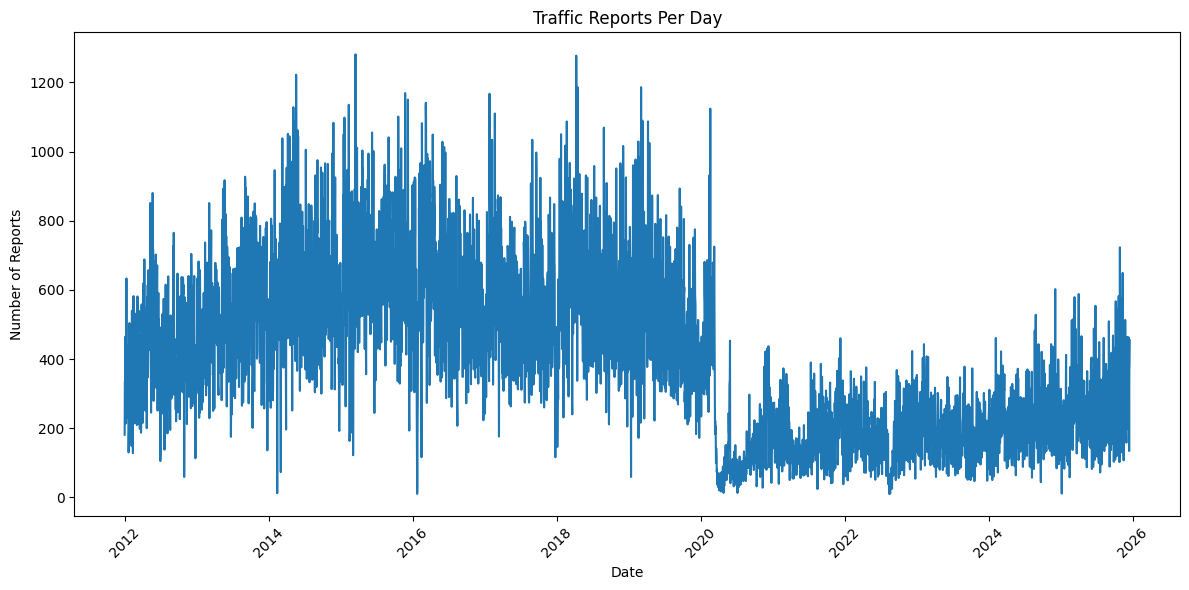

In [ ]:
traffic_df['date_of_stop'] = pd.to_datetime(traffic_df['date_of_stop'])

reports_per_day = (
    traffic_df
    .groupby(traffic_df['date_of_stop'].dt.date)
    .size()
)

plt.figure(figsize=(12, 6))
plt.plot(reports_per_day.index, reports_per_day.values)
plt.xlabel("Date")
plt.ylabel("Number of Reports")
plt.title("Traffic Reports Per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Clean Up Car Names

In [ ]:
# normalize raw values first
traffic_df['make'] = (
    traffic_df['make']
    .astype('string')
    .str.upper()
    .str.strip()
)

make_map = {
    "ACUR": "ACURA",
    "BUIC": "BUICK",
    "BUICK": "BUICK",
    "BUICK ": "BUICK",
    "BUIK": "BUICK",
    "BUICK1": "BUICK",
    "CADI": "CADILLAC",
    "CCHEVROLET": "CHEVROLET",
    "CHEV": "CHEVROLET",
    "CHEVY": "CHEVROLET",
    "CHRY": "CHRYSLER",
    "DODG": "DODGE",
    "FOD": "FORD",
    "FOR": "FORD",
    "FORD": "FORD",
    "FRD": "FORD",
    "FROD": "FORD",
    "GMC": "GMC",
    "GM": "GMC",
    "GMC ": "GMC",
    "GMC1": "GMC",
    "G M C": "GMC",
    "HOND": "HONDA",
    "HYUN": "HYUNDAI",
    "INFI": "INFINITI",
    "INFINITY": "INFINITI",
    "JAG": "JAGUAR",
    "LEXU": "LEXUS",
    "LEXS": "LEXUS",
    "MAZD": "MAZDA",
    "MERCEDEZ": "MERCEDES",
    "MERZ": "MERCEDES",
    "MITS": "MITSUBISHI",
    "NISS": "NISSAN",
    "NISSIAN": "NISSAN",
    "PONT": "PONTIAC",
    "SUBA": "SUBARU",
    "TOY": "TOYOTA",
    "TOYO": "TOYOTA",
    "TOYOA": "TOYOTA",
    "TOYOT": "TOYOTA",
    "TOYT": "TOYOTA",
    "TOYTA": "TOYOTA",
    "TYOTA": "TOYOTA",
    "VOLK": "VOLKSWAGEN",
    "VOLKS": "VOLKSWAGEN",
    "VOLKSWAGON": "VOLKSWAGEN",
    "VOLV": "VOLVO",
    "VW": "VOLKSWAGEN",
    "`TOYOTA": "TOYOTA"
}


# apply deterministic mapping
traffic_df['make_clean'] = traffic_df['make'].replace(make_map)

# collapse all unmapped values to NOT DETERMINED
traffic_df.loc[
    ~traffic_df['make_clean'].isin(make_map.values()),
    'make_clean'
] = 'NOT DETERMINED'


In [ ]:
make_counts = (
    traffic_df["make"]
    .astype("string")
    .str.upper()
    .str.strip()
    .value_counts(dropna=False)
    .reset_index()
)

make_counts.columns = ["make_raw", "count"]

make_counts.to_csv("make_counts.csv", index=False)
# files.download("make_counts.csv")


In [ ]:
make_counts = (
    traffic_df["make"]
    .astype("string")
    .str.upper()
    .str.strip()
    .value_counts(dropna=False)
    .reset_index()
)

make_counts.columns = ["make_raw", "count"]


# Work off the counts table so we only process each unique value once
make_map_df = make_counts.copy()

# ----------------------------
# 1) Normalize text
# ----------------------------
make_map_df["make_clean"] = (
    make_map_df["make_raw"]
    .astype("string")
    .str.upper()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

# ----------------------------
# 2) Detect obvious junk
# ----------------------------
make_map_df["has_digits"] = make_map_df["make_clean"].str.contains(r"\d", na=False)
make_map_df["bad_chars"] = ~make_map_df["make_clean"].str.match(r"^[A-Z &/\-]+$", na=False)
make_map_df["too_short"] = make_map_df["make_clean"].str.len().fillna(0).lt(2)
make_map_df["too_long"] = make_map_df["make_clean"].str.len().fillna(0).gt(25)

make_map_df["junk_reason"] = np.select(
    [make_map_df["has_digits"], make_map_df["bad_chars"], make_map_df["too_short"], make_map_df["too_long"]],
    ["digits_present", "invalid_chars", "too_short", "too_long"],
    default="ok"
)

make_map_df["make_stage1"] = make_map_df["make_clean"].where(make_map_df["junk_reason"].eq("ok"))

# ----------------------------
# 3) High-certainty manual fixes
# ----------------------------
manual_map = {
    "TOYT": "TOYOTA",
    "TOYO": "TOYOTA",
    "TYOTA": "TOYOTA",
    "CHEV": "CHEVROLET",
    "CHEVY": "CHEVROLET",
    "MERCADES BENZ": "MERCEDES",
    "MERCEDES BENZ": "MERCEDES",
    "MITSHUBISHU": "MITSUBISHI",
    "VOLKS": "VOLKSWAGEN",
    "VW": "VOLKSWAGEN",
}

make_map_df["make_stage2"] = make_map_df["make_stage1"].replace(manual_map)

# ----------------------------
# 4) Build trusted list from frequency
# ----------------------------
trusted = (
    make_map_df.loc[make_map_df["count"] >= 500, "make_stage2"]
    .dropna()
    .unique()
    .tolist()
)

# ----------------------------
# 5) Conservative fuzzy matching
# ----------------------------
def standardize_and_score(x):
    if pd.isna(x):
        return pd.Series([pd.NA, "filtered", "low"])

    if x in trusted:
        return pd.Series([x, "trusted", "high"])

    match = process.extractOne(x, trusted, scorer=fuzz.WRatio)
    if not match:
        return pd.Series([x, "no_match", "low"])

    name, score, _ = match
    if score >= 93:
        return pd.Series([name, f"fuzzy_{score}", "high"])
    elif score >= 88:
        return pd.Series([name, f"fuzzy_{score}", "medium"])
    else:
        return pd.Series([x, f"low_score_{score}", "low"])

make_map_df[["make_standard", "make_reason", "make_confidence"]] = (
    make_map_df["make_stage2"].apply(standardize_and_score)
)

# Create a dict mapping raw -> standardized
raw_to_std = dict(zip(make_map_df["make_raw"], make_map_df["make_standard"]))
raw_to_reason = dict(zip(make_map_df["make_raw"], make_map_df["make_reason"]))
raw_to_conf = dict(zip(make_map_df["make_raw"], make_map_df["make_confidence"]))

traffic_df["make_raw"] = traffic_df["make"].astype("string").str.upper().str.strip()

traffic_df["make_standard"] = traffic_df["make_raw"].map(raw_to_std)
traffic_df["make_reason"] = traffic_df["make_raw"].map(raw_to_reason)
traffic_df["make_confidence"] = traffic_df["make_raw"].map(raw_to_conf)


### Clean Up Arrest Type

In [ ]:
traffic_df["arrest_type"] = (
    traffic_df["arrest_type"]
    .str.replace(r"^[A-Z]\s-\s", "", regex=True)
)

traffic_df["arrest_type"].value_counts()




,count
arrest_type,
Marked Patrol,1660708
Marked Laser,199447
Unmarked Patrol,98152
Motorcycle,20970
Marked Moving Radar (Stationary),19898
License Plate Recognition,16409
Marked Stationary Radar,16158
Foot Patrol,14909
Unmarked Laser,11254


### Clean Up Description/Reason For Stop

In [ ]:

desc = (
    traffic_df["description"]
    .astype("string")
    .str.upper()
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

rules = [
    ("DUI / IMPAIRMENT", r"\b(DUI|DWI|IMPAIRED|INTOX|DRUNK|BAC|SOBRIETY|FIELD\s*SOBRIETY)\b"),
    ("SPEEDING", r"\b(SPEED(ING)?|SPD|OVER\s*(THE\s*)?LIMIT|MPH|RADAR|LIDAR|PACE[D]?)\b"),
    ("RED LIGHT", r"\b(RED\s*LIGHT|RAN\s*(A\s*)?RED|SIGNAL\s*VIOLATION|TRAFFIC\s*SIGNAL)\b"),
    ("STOP SIGN", r"\b(STOP\s*SIGN|FAILED\s*TO\s*STOP|F/T\s*STOP|ROLL(ING)?\s*STOP)\b"),
    ("LANE / MOVING VIOLATION", r"\b(UNSAFE\s*LANE|LANE\s*VIOL|FAIL(ED)?\s*TO\s*MAINTAIN\s*LANE|FTML|WEAV(ING|E)|SWERV(ING|E)|IMPROPER\s*LANE|IMPROPER\s*TURN|ILLEGAL\s*TURN|FAIL(ED)?\s*TO\s*YIELD|YIELD|FOLLOW(ING)?\s*TOO\s*CLOSE|TAILGAT(ING)?)\b"),
    ("CELL PHONE / DISTRACTED", r"\b(CELL(PHONE)?|MOBILE|TEXT(ING)?|HANDS?\s*FREE|DISTRACT(ED|ION)?)\b"),
    ("SEATBELT / RESTRAINT", r"\b(SEAT\s*BELT|SEATBELT|BELT(S)?|NO\s*BELT|UNRESTRAIN(ED)?|CHILD\s*(SEAT|RESTRAINT))\b"),
    ("TAG / PLATE ISSUE", r"\b(TAG|PLATE|LICENSE\s*PLATE|TEMP\s*TAG|TEMPORARY\s*TAG|NO\s*TAG|OBSCUR(ED|E)\s*PLATE|DISPLAY\s*PLATE)\b"),
    ("REGISTRATION / INSPECTION", r"\b(REG(ISTRATION)?|EXPIRED\s*REG|SUSPENDED\s*REG|INSPECTION|EXPIRED\s*INSPECTION|STICKER)\b"),
    ("LICENSE / INSURANCE", r"\b(DRIV(ER)?\s*LIC(ENSE)?|NO\s*LICENSE|SUSPENDED\s*LICENSE|REVOKED\s*LICENSE|INSURANCE|NO\s*INSURANCE|PROOF\s*OF\s*INSURANCE)\b"),
    ("EQUIPMENT / LIGHTING", r"\b(BRAKE\s*LIGHT|TAIL\s*LIGHT|HEAD\s*LIGHT|HEADLIGHT|TAILLIGHT|NO\s*LIGHTS?|LIGHT(S)?\s*OUT|TURN\s*SIGNAL|SIGNAL\s*OUT|EQUIPMENT\s*VIOL|DEFECTIVE)\b"),
    ("WINDOW TINT", r"\b(TINT|WINDOW\s*TINT)\b"),
    ("RECKLESS / AGGRESSIVE", r"\b(RECKLESS|NEGLIGENT|AGGRESSIVE|CARELESS|DANGEROUS)\b"),
    ("WARRANT / INVESTIGATIVE", r"\b(BOLO|WARRANT|WANTED|SUSPECT|MATCH(ED)?\s*DESCRIPTION|STOLEN|ALERT)\b"),
]

conditions = [desc.str.contains(pat, regex=True, na=False) for _, pat in rules]
choices = [label for label, _ in rules]

traffic_df["stop_reason_clean"] = np.select(conditions, choices, default="OTHER/UNKNOWN")
traffic_df["stop_reason_clean"].value_counts().head(20)


/tmp/ipython-input-1591256103.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions = [desc.str.contains(pat, regex=True, na=False) for _, pat in rules]


,count
stop_reason_clean,
OTHER/UNKNOWN,1026690
SPEEDING,361449
REGISTRATION / INSPECTION,239061
TAG / PLATE ISSUE,120055
STOP SIGN,68353
LICENSE / INSURANCE,48901
RED LIGHT,46439
RECKLESS / AGGRESSIVE,46101
SEATBELT / RESTRAINT,35076


### Make Time Easy To Read

In [ ]:
traffic_df['time_of_stop_dt'] = pd.to_datetime(traffic_df['time_of_stop'], format='%H:%M:%S')

traffic_df['stop_hour_readable'] = (
    traffic_df['time_of_stop_dt']
    .dt.strftime('%I %p')        # '11 PM'
    .str.lstrip('0')             # remove leading zero
    .str.lower()                 # '11 pm'
)

### Clean Gender

In [ ]:
traffic_df['gender'].value_counts()

,count
gender,
M,1396674
F,673973
U,3529


In [ ]:
traffic_df["gender"] = (
    traffic_df["gender"]
    .astype("string")
    .str.strip()
    .str.upper()
    .map({"M": "Male", "F": "Female"})
    .fillna("Not Mentioned")
)


# Drop Columns

Use as reference

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074176 entries, 0 to 2074175
Data columns (total 26 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   seqid                    object        
 1   date_of_stop             datetime64[ns]
 2   time_of_stop             object        
 3   location                 object        
 4   latitude                 float64       
 5   longitude                float64       
 6   accident                 object        
 7   fatal                    object        
 8   vehicletype              object        
 9   make                     string        
 10  color                    object        
 11  charge                   object        
 12  contributed_to_accident  bool          
 13  race                     object        
 14  gender                   object        
 15  driver_city              object        
 16  driver_state             object        
 17  dl_state                 ob

Colums that I want to drop when I do full run. Worry about others later.

       
      First set
        # Location / agency metadata
        'agency',
        'subagency',

        # Vehicle / stop context not used in analysis
        'hazmat',
        'work_zone',

        # Search-related fields
        'search_conducted',
        'search_disposition',
        'search_outcome',
        'search_reason',
        'search_reason_for_stop',
        'search_type',
        'search_arrest_reason',

        # Vehicle identity fields
        'year',
        'model',

        # Derived / redundant fields
        'geolocation',
        'make_standard'
      
      Second set
        # Injury / damage flags
        'belts',
        'personal_injury',
        'property_damage',

        # Commercial / licensing info
        'commercial_license',
        'commercial_vehicle',
        'alcohol',
        'state',

        # Violation metadata
        'violation_type',
        'article'
      
      Third Set
        'description_clean',
        'description

In [ ]:
drop_input = input("Decide if you want to drop columns (y/n): ").lower()

if drop_input == 'y':
    cols_to_drop = [
      'description_clean',
        'description'

    ]

    traffic_df = traffic_df.drop(columns=cols_to_drop)
else:
    print("No columns dropped")


Decide if you want to drop columns (y/n): y


In [ ]:
traffic_df['make_clean'].value_counts()

,count
make_clean,
TOYOTA,366689
NOT DETERMINED,326335
HONDA,308371
FORD,188252
NISSAN,155417
CHEVROLET,148701
HYUNDAI,72998
DODGE,66165
ACURA,62654


In [ ]:
print(f"Your data set contains: {traffic_df.shape[0]} rows, and {traffic_df.shape[1]} columns.")


Your data set contains: 2074176 rows, and 26 columns.
